<a href="https://colab.research.google.com/github/ValasammagariTejasree/car-price-prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np # linear algebra
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving car price prediction dataset.csv to car price prediction dataset.csv


In [22]:
df=pd.read_csv("/content/car price prediction dataset.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [23]:
# Inspect data for integrity
print("Dimension of the dataset: ", df.shape, '\n')
print("Brief information of the dataset: ", df.info())

Dimension of the dataset:  (8128, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
Brief information of the dataset:  None


In [24]:
fuel_value_counts = df['fuel'].value_counts().to_frame()
fuel_value_counts.rename(columns = {'fuel':'count'}, inplace = True)
fuel_value_counts.index.name = 'fuel'
fuel_value_counts

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [25]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
  print(missing_data[column].value_counts())
  print("")

name
False    8128
Name: count, dtype: int64

year
False    8128
Name: count, dtype: int64

selling_price
False    8128
Name: count, dtype: int64

km_driven
False    8128
Name: count, dtype: int64

fuel
False    8128
Name: count, dtype: int64

seller_type
False    8128
Name: count, dtype: int64

transmission
False    8128
Name: count, dtype: int64

owner
False    8128
Name: count, dtype: int64

mileage(km/ltr/kg)
False    7907
True      221
Name: count, dtype: int64

engine
False    7907
True      221
Name: count, dtype: int64

max_power
False    7913
True      215
Name: count, dtype: int64

seats
False    7907
True      221
Name: count, dtype: int64



In [26]:
df['max_power'] = pd.to_numeric(df['max_power'],errors = 'coerce')
missing_values=['seats', 'engine', 'max_power', 'mileage(km/ltr/kg)']
for col in missing_values:
    df[col].fillna(df[col].mean())
    df.isnull().sum()

In [27]:
df.dropna(subset=['seats'], axis = 0, inplace = True)
df.dropna(subset=['max_power'], axis = 0, inplace = True)
df.dropna(subset=['engine'], axis = 0, inplace = True)
df.dropna(subset=['mileage(km/ltr/kg)'], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [28]:
duplicate_df = df.duplicated()
duplicate_df.value_counts()

,count
False,6717
True,1189


In [29]:
df1 = df.drop_duplicates()
df1.shape

(6717, 12)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 7903
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6717 non-null   object 
 1   year                6717 non-null   int64  
 2   selling_price       6717 non-null   int64  
 3   km_driven           6717 non-null   int64  
 4   fuel                6717 non-null   object 
 5   seller_type         6717 non-null   object 
 6   transmission        6717 non-null   object 
 7   owner               6717 non-null   object 
 8   mileage(km/ltr/kg)  6717 non-null   float64
 9   engine              6717 non-null   float64
 10  max_power           6717 non-null   float64
 11  seats               6717 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 682.2+ KB


In [31]:
df1.rename(columns = {'mileage(km/ltr/kg)': 'Mileage'}, inplace=True)
df1.columns

<ipython-input-31-d1314826f8b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'mileage(km/ltr/kg)': 'Mileage'}, inplace=True)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [32]:
df1.seats = df1.seats.astype(int)
df1['seats'].dtype

<ipython-input-32-968e3c6eab0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.seats = df1.seats.astype(int)


dtype('int64')

In [33]:
df1.describe()

,year,selling_price,km_driven,Mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [34]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns

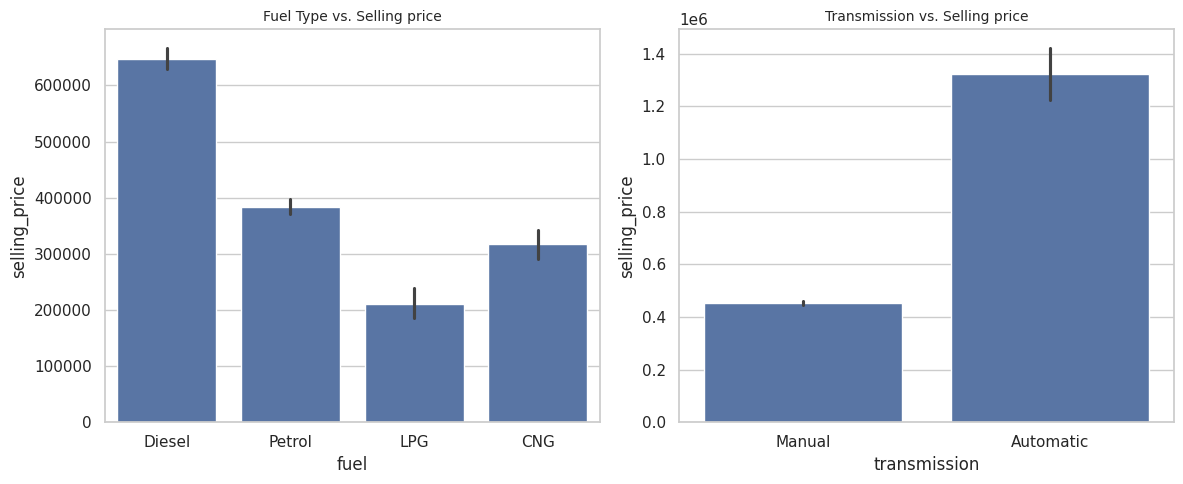

In [35]:
fig = plt.figure(figsize=(12, 5))
sns.set_theme(style="whitegrid")
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#subplot1: bar plot
sns.barplot(data=df1, x = "fuel", y="selling_price", ax=ax0)
ax0.set_title("Fuel Type vs. Selling price", fontsize=10)

#subplot2: bar plot
sns.barplot(data=df1, x="transmission", y="selling_price", ax=ax1)
ax1.set_title("Transmission vs. Selling price", fontsize=10)
plt.tight_layout()

In [36]:
new = df1["name"].str.split(" ", n=1, expand=True)
# Make new column for 'make'
df1["make"] = new[0]
# Make new column for 'model'
df1["model"] = new[1]
df1.drop(columns=["name"], inplace=True)
df1.head(5)

<ipython-input-36-475818a388b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["make"] = new[0]
<ipython-input-36-475818a388b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["model"] = new[1]
<ipython-input-36-475818a388b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=["name"], inplace=True

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Mileage,engine,max_power,seats,make,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti,Swift VXI BSIII


<Axes: xlabel='selling_price', ylabel='make'>

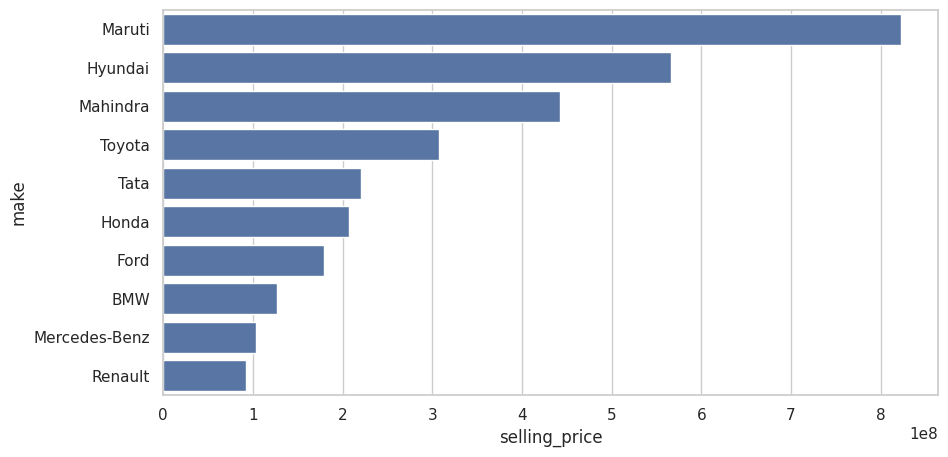

In [37]:
plt.figure(figsize = (10,5))
make_list=df1.groupby('make')['selling_price'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(make_list, x="selling_price", y='make')


<Axes: xlabel='selling_price', ylabel='model'>

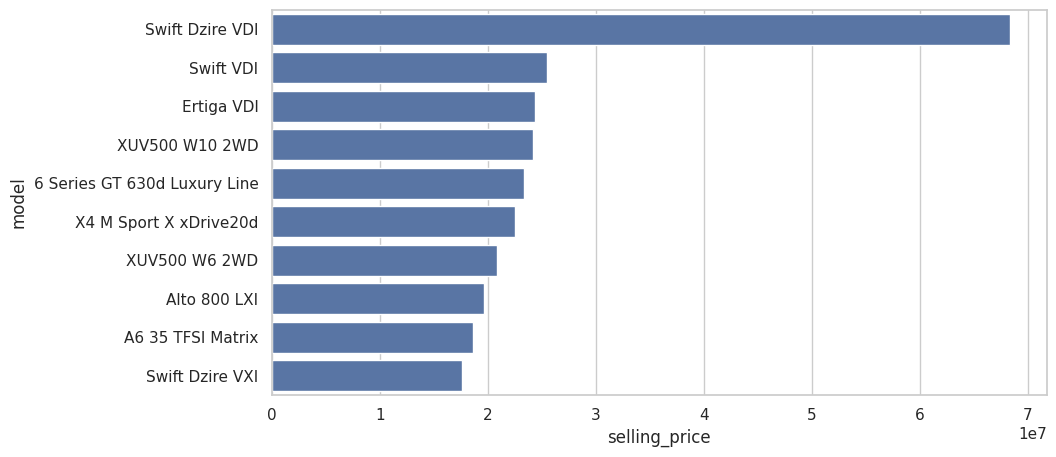

In [38]:
plt.figure(figsize=(10, 5))
model_list=df1.groupby('model')['selling_price'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=model_list, x='selling_price', y='model')


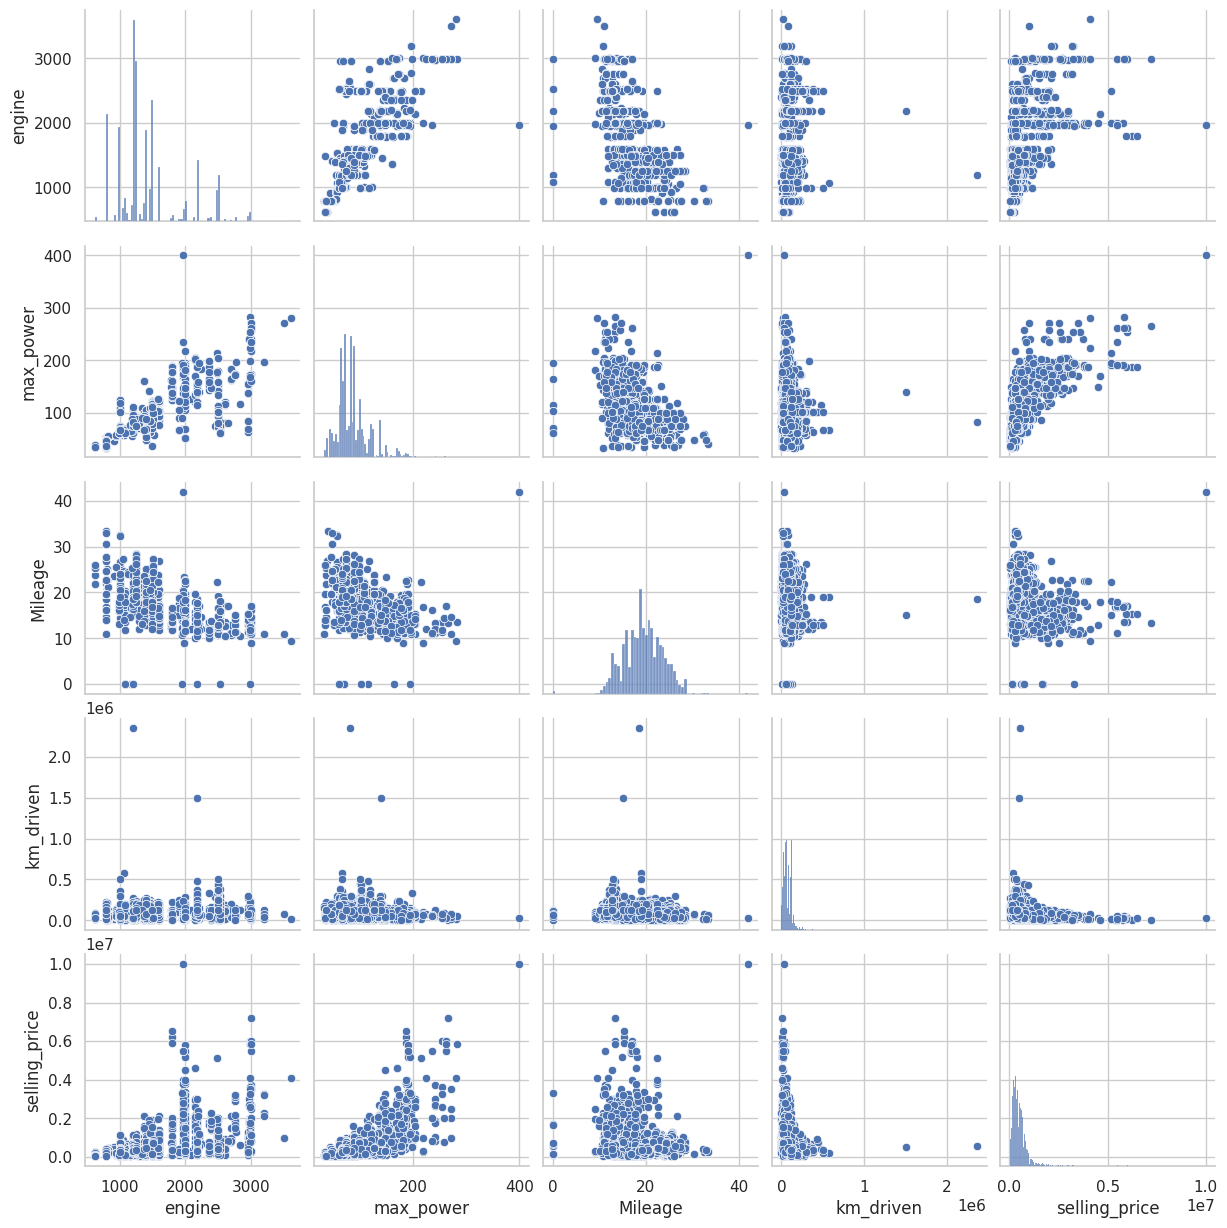

In [39]:
pair_df = df1[['engine', 'max_power', 'Mileage','km_driven', 'selling_price']]
sns.pairplot(pair_df)


<Axes: xlabel='engine', ylabel='selling_price'>

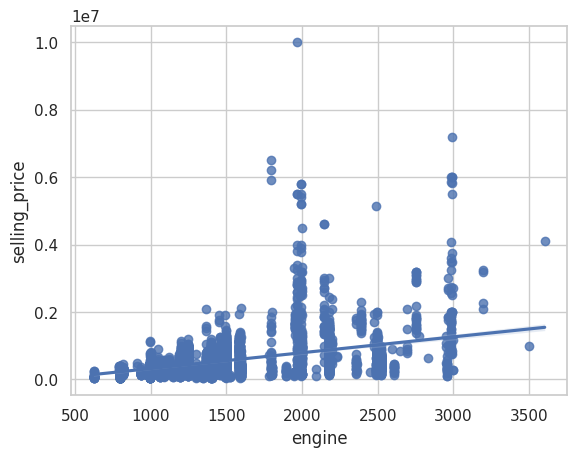

In [42]:
sns.regplot(x = 'engine', y = 'selling_price', data = df1)

In [43]:
df1[['engine', 'selling_price']].corr()

,engine,selling_price
engine,1.000000,0.442772
selling_price,0.442772,1.000000


<Axes: xlabel='km_driven', ylabel='selling_price'>

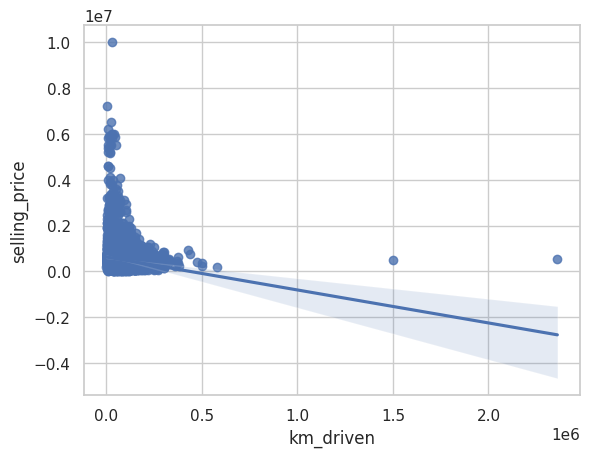

In [44]:
sns.regplot(x = 'km_driven', y = 'selling_price', data = df1)

In [45]:
df1[['km_driven', 'selling_price']].corr()

,km_driven,selling_price
km_driven,1.000000,-0.161265
selling_price,-0.161265,1.000000


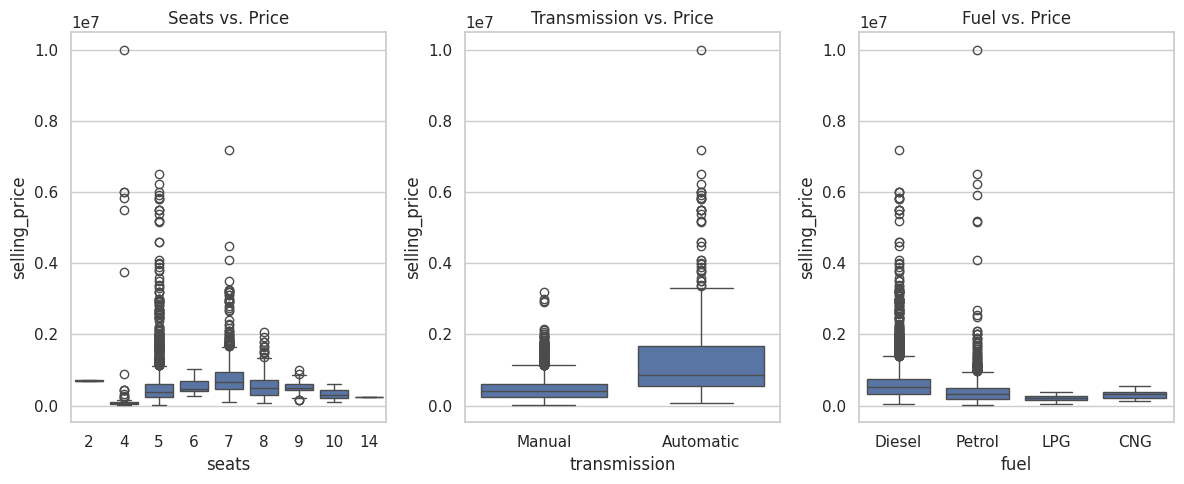

In [46]:
fig = plt.figure(figsize=(12, 5))
ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

#subplot1: box plot
sns.boxplot(data=df1, x = "seats", y = "selling_price", ax=ax0)
ax0.set_title("Seats vs. Price", fontsize=12)

#subplot2: box plot
sns.boxplot(data=df1, x="transmission", y="selling_price", ax=ax1)
ax1.set_title("Transmission vs. Price", fontsize=12)

#subplot3: boxplot
sns.boxplot(data=df1, x='fuel', y='selling_price', ax=ax2)
ax2.set_title("Fuel vs. Price", fontsize=12)

plt.tight_layout()

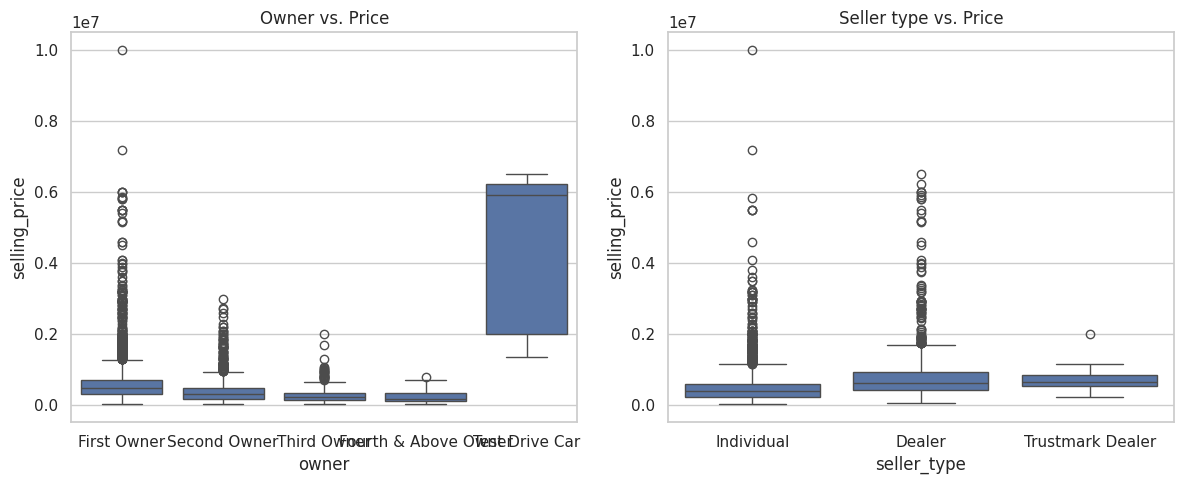

In [47]:
fig = plt.figure(figsize=(12, 5))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#subplot1: box plot
sns.boxplot(data=df1, x = 'owner', y = 'selling_price', ax=ax0)
#set_xticklabels(.get_xticklabels(), rotation=15)
ax0.set_title("Owner vs. Price", fontsize=12)

#subplot2: scatter plot
sns.boxplot(data=df1, x="seller_type", y="selling_price", ax=ax1)
ax1.set_title("Seller type vs. Price", fontsize=12)
plt.tight_layout()


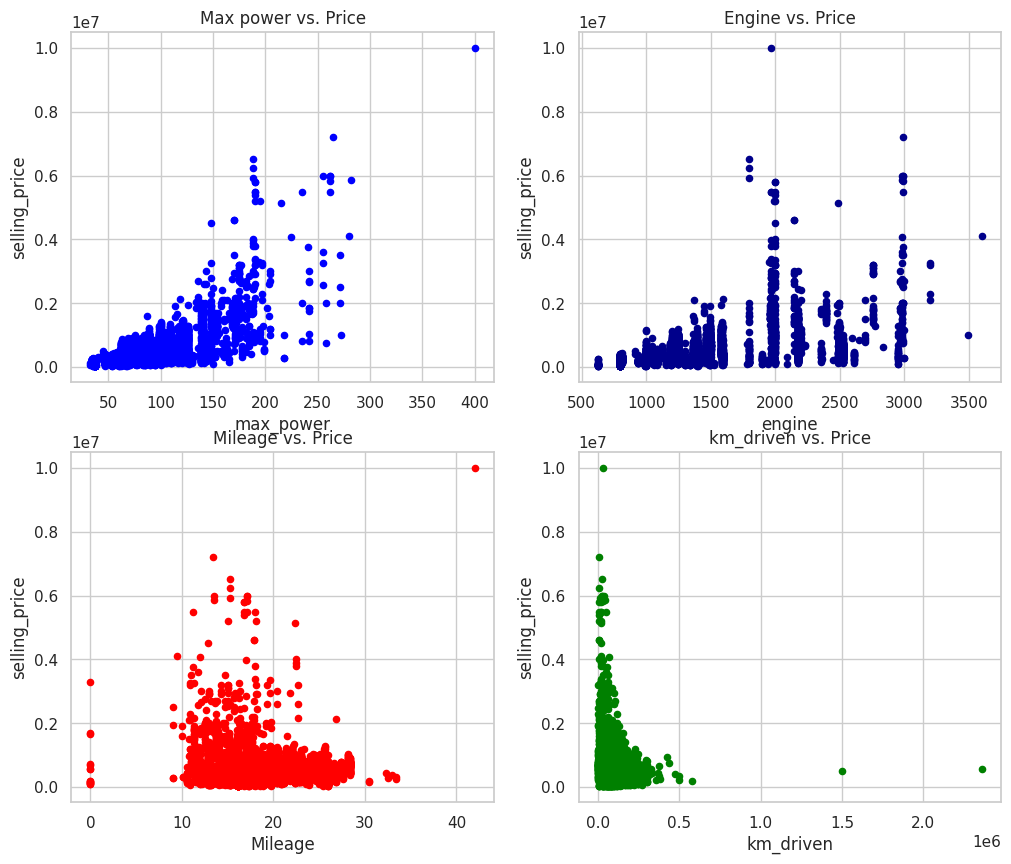

In [49]:
fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

#subplot1: scatter plot
df1.plot(kind='scatter',x="max_power", y="selling_price", color='blue', ax=ax0)
ax0.set_title("Max power vs. Price")

#subplot2: scatter plot
df1.plot(kind='scatter', x="engine", y="selling_price", color='darkblue', ax=ax1)
ax1.set_title("Engine vs. Price")
#ax1.set_xlabel("Engine")

#subplot3: scatter plot
df1.plot(kind='scatter', x="Mileage", y="selling_price", color='red', ax=ax2)
ax2.set_title("Mileage vs. Price")

#subplot4: scatter plot
df1.plot(kind='scatter', x="km_driven", y="selling_price", color='green', ax=ax3)
ax3.set_title("km_driven vs. Price")
plt.show()


In [67]:
from sklearn.metrics import accuracy_score

# Actual values (true labels)
y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]  # Example: Actual labels

# Predicted values
y_pred = [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]  # Example: Predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Display the result
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.82%
